# Prepare Dataset

In [134]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model, Sequential, layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

# data in google colab
TRAIN_DATASET_PATH = '/content/sample_data/california_housing_train.csv'
TEST_DATASET_PATH = '/content/sample_data/california_housing_test.csv'

train_data = pd.read_csv(TRAIN_DATASET_PATH)
test_data = pd.read_csv(TEST_DATASET_PATH)

In [135]:
# display dataframe of dataset '10 rows'
train_data.iloc[:10, :].style

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000
1,-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000
2,-114.560000,33.690000,17.000000,720.000000,174.000000,333.000000,117.000000,1.650900,85700.000000
3,-114.570000,33.640000,14.000000,1501.000000,337.000000,515.000000,226.000000,3.191700,73400.000000
4,-114.570000,33.570000,20.000000,1454.000000,326.000000,624.000000,262.000000,1.925000,65500.000000
5,-114.580000,33.630000,29.000000,1387.000000,236.000000,671.000000,239.000000,3.343800,74000.000000
6,-114.580000,33.610000,25.000000,2907.000000,680.000000,1841.000000,633.000000,2.676800,82400.000000
7,-114.590000,34.830000,41.000000,812.000000,168.000000,375.000000,158.000000,1.708300,48500.000000
8,-114.590000,33.610000,34.000000,4789.000000,1175.000000,3134.000000,1056.000000,2.178200,58400.000000
9,-114.600000,34.830000,46.000000,1497.000000,309.000000,787.000000,271.000000,2.190800,48100.000000


In [136]:
# scale dataset 'train' and 'test' with standard scale (MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler

standard_scaler = MinMaxScaler()
train_data_scaled = pd.DataFrame(
    standard_scaler.fit_transform(train_data),
    columns=train_data.columns
)
test_data_scaled = pd.DataFrame(
    standard_scaler.transform(test_data),
    columns = test_data.columns
)

In [137]:
# display dataset training after Standard scaling
train_data_scaled.iloc[:5, :].style

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530,0.107012
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040,0.134228
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378,0.145775
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639,0.120414
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281,0.104125


In [159]:
# display dataframe distribution
def display(data1, data2):
  colors = ['#000000', '#0000FF', '#7FFFD4', '#006400', '#FFD700', '#FF00FF', '#FF0000', '#FFA500', '#008080']

  plt.figure(figsize=(20,10))
  plt.subplot(1, 2, 1)
  if isinstance(data1, pd.DataFrame):
    x = [i for i in range(data1.index.shape[0])]
    i = 0
    for column in data1.columns:
      y = data1[column]
      plt.plot(x, y, '.', c=colors[i])
      i += 1
  else:
    rows, columns = data1.shape
    x = [i for i in range(rows)]
    for i in range(columns):
      y = data1[:, i]
      plt.plot(x, y, '.', c=colors[i])
  
  plt.subplot(1, 2, 2)
  if isinstance(data2, pd.DataFrame):
    x = [i for i in range(data2.index.shape[0])]
    i = 0
    for column in data2.columns:
      y = data2[column]
      plt.plot(x, y, '.', c=colors[i])
      i += 1
  else:
    rows, columns = data2.shape
    x = [i for i in range(rows)]
    for i in range(columns):
      y = data2[:, i]
      plt.plot(x, y, '.', c=colors[i])

  plt.show()

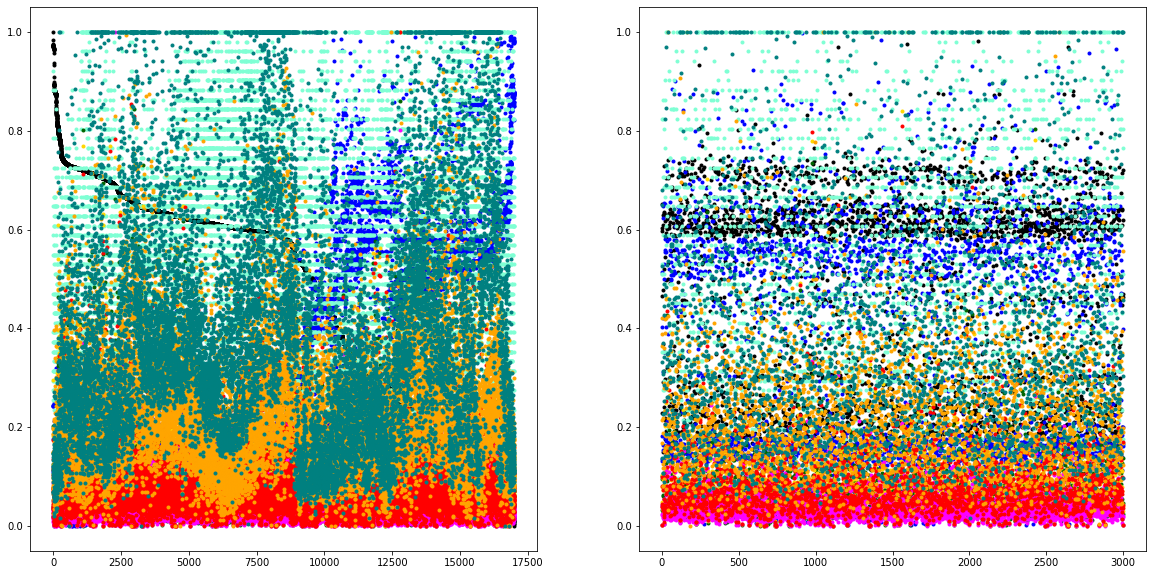

In [160]:
display(train_data_scaled, test_data_scaled)

# Autoencoder Model

In [140]:
# bottlneck & output size
bottleneck_size = 4
output_size = len(train_data_scaled.columns)

# create autoencoder class 'Model'
class AutoEncoders(Model):

  def __init__(self):

    super().__init__()
    self.encoder = Sequential(
        [
          layers.Dense(32, activation="relu"),
          layers.Dense(16, activation="relu"),
          layers.Dense(8, activation="relu"),
          layers.Dense(bottleneck_size, activation="relu")
        ],
        name="encoder"
    )

    self.decoder = Sequential(
        [
          layers.Dense(8, activation="relu"),
          layers.Dense(16, activation="relu"),
          layers.Dense(32, activation="relu"),
          layers.Dense(output_size, activation="sigmoid")
        ]
    )

  def call(self, inputs):

    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

In [141]:
# compile autoencoder model
auto_encoder = AutoEncoders()
auto_encoder.compile(
    loss='mae',
    metrics=['mae'],
    optimizer='adam'
)

In [142]:
# train autoencoder model
history = auto_encoder.fit(
    train_data_scaled, train_data_scaled, 
    epochs=50, 
    batch_size=32, 
    validation_data=(test_data_scaled, test_data_scaled)
)

Epoch 1/50
532/532 [==============================] - 3s 5ms/step - loss: 0.1284 - mae: 0.1284 - val_loss: 0.0978 - val_mae: 0.0978
Epoch 2/50
532/532 [==============================] - 3s 5ms/step - loss: 0.0845 - mae: 0.0845 - val_loss: 0.0582 - val_mae: 0.0582
Epoch 3/50
532/532 [==============================] - 3s 5ms/step - loss: 0.0568 - mae: 0.0568 - val_loss: 0.0539 - val_mae: 0.0539
Epoch 4/50
532/532 [==============================] - 2s 5ms/step - loss: 0.0533 - mae: 0.0533 - val_loss: 0.0506 - val_mae: 0.0506
Epoch 5/50
532/532 [==============================] - 3s 5ms/step - loss: 0.0499 - mae: 0.0499 - val_loss: 0.0465 - val_mae: 0.0465
Epoch 6/50
532/532 [==============================] - 2s 5ms/step - loss: 0.0469 - mae: 0.0469 - val_loss: 0.0455 - val_mae: 0.0455
Epoch 7/50
532/532 [==============================] - 3s 5ms/step - loss: 0.0448 - mae: 0.0448 - val_loss: 0.0441 - val_mae: 0.0441
Epoch 8/50
532/532 [==============================] - 2s 5ms/step - loss: 0.

# Test autoencoder

In [143]:
# test autoencoder & visualize result in pandas dataframe
result = pd.DataFrame(auto_encoder.predict(test_data_scaled))
result = result.add_prefix('feature_')

result.iloc[:5,:].style

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,0.220426,0.536412,0.517588,0.059312,0.061988,0.029526,0.065625,0.383350,0.739288
1,0.587335,0.168407,0.825542,0.041906,0.059297,0.029935,0.061535,0.184249,0.329875
2,0.630677,0.131132,0.512956,0.053374,0.063310,0.027978,0.065450,0.290408,0.540069
3,0.614869,0.137297,0.543472,0.054978,0.062489,0.026489,0.064626,0.335985,0.661195
4,0.305071,0.565107,0.360419,0.043549,0.054922,0.025760,0.055614,0.170985,0.193901


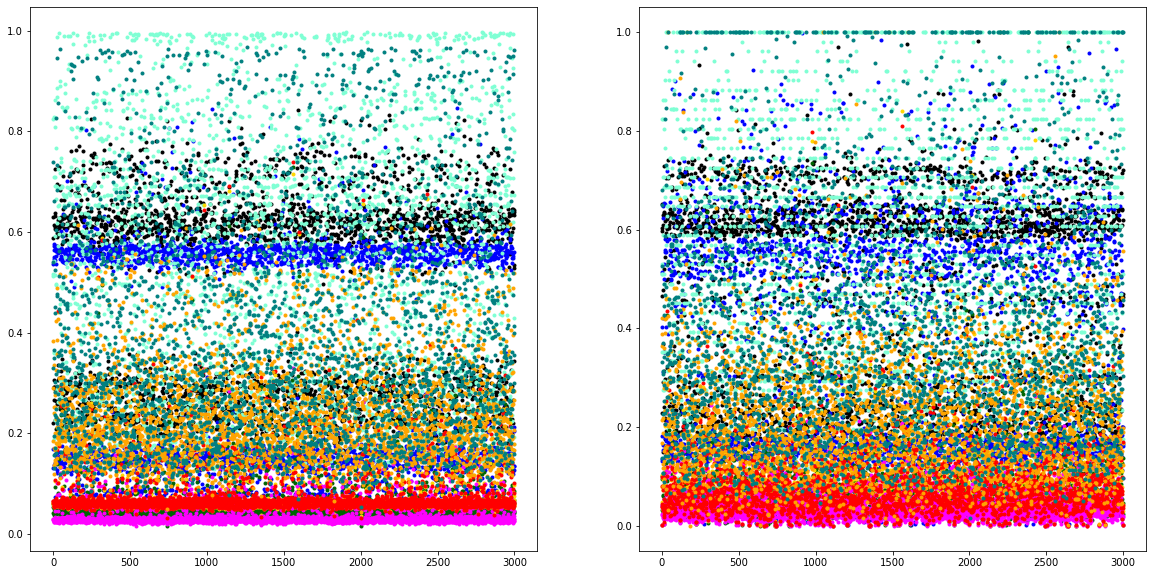

In [161]:
display(result, test_data_scaled)

In [145]:
# test encoder layer
encoder_layer = auto_encoder.get_layer('encoder')
reduced_df = pd.DataFrame(encoder_layer.predict(test_data_scaled))
reduced_df = reduced_df.add_prefix('feature_')

reduced_df.iloc[:5,:].style

,feature_0,feature_1,feature_2,feature_3
0,0.000000,0.000000,2.668111,0.664534
1,0.000000,0.094158,3.288491,1.976032
2,0.000000,0.315250,2.587142,1.618689
3,0.000000,0.269404,2.659674,1.509548
4,0.000000,0.000000,2.336769,0.225298


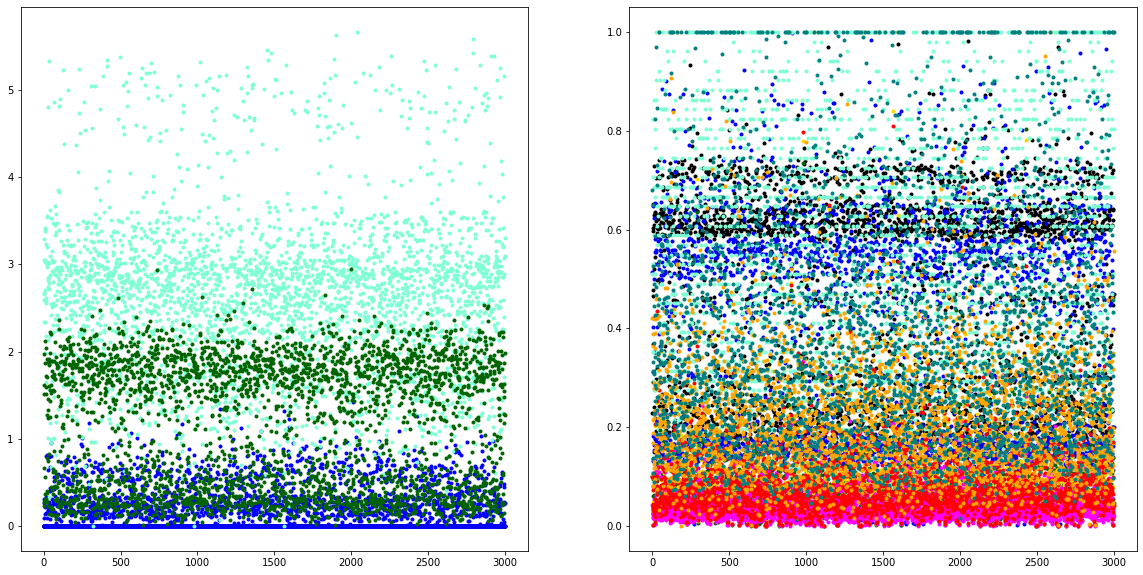

In [162]:
display(reduced_df, test_data_scaled)

# Principal Component Analysis (ACP)



In [147]:
from sklearn.decomposition import PCA
pca = PCA(n_components= bottleneck_size)
pca.fit(train_data_scaled)
result_pca = pca.transform(test_data_scaled)

# Comparison between AE and PCA

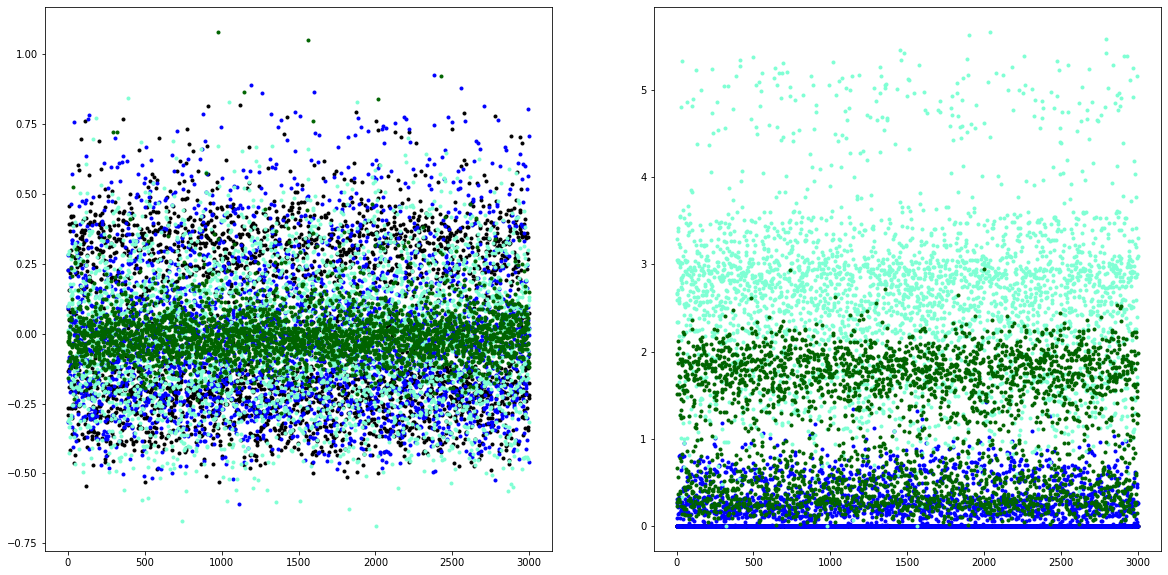

In [163]:
display(result_pca, reduced_df)